Mahan Madani - 99222092

Assignment 2 (Part 2) - Titanic Spaceship Dataset

## Table of Contents:

- [Load Dataset and Import Libraries](##Load-Dataset-and-Import-Libraries)
- [Basic Data Analysis](##Basic-Data-Analysis)
- [Data Preprocessing](##Data-Preprocessing)
    - [Duplicate Values](###Check-for-Duplicate-Values)
    - [Null Values](###Handle-Null-Values)
    - [Outlier Detection](###Outlier-Detection)
- [Visualization](##Visualization)
- [Train Model - No Feature Engineering](##Train-Model-(No-Feature-Engineering))
    - [Utility Functions](###Utility-Functions)
    - [Train and Test Model 1](###Train-and-Test-Model-1)
- [Feature Engineering](##Feature-Engineering)
    - [Feature Encoding](##Feature-Encoding)
- [Train Model - With Feature Engineering](##Train-Model-(With-Feature-Engineering))
- [Final Results](##Final-Results)

## Load Dataset and Import Libraries

In [1]:
import os, zipfile
import re

import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score, roc_curve, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# !pip install kaggle

# kaggle token
os.environ['KAGGLE_CONFIG_DIR'] = "./.kaggle"

!kaggle competitions download -p ./dataset -c spaceship-titanic


spaceship-titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
with zipfile.ZipFile('./dataset/spaceship-titanic.zip', 'r') as zip_ref:
    zip_ref.extractall('./dataset')

In [4]:
df = pd.read_csv("dataset/train.csv")
test_df = pd.read_csv("dataset/test.csv")
print(df.columns)
print(df.shape)

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')
(8693, 14)


## Basic Data Analysis

In [5]:
pd.options.display.max_columns = None
df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


In [6]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
df.describe(include=['object', 'bool'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported
count,8693,8492,8476,8494,8511,8490,8493,8693
unique,8693,3,2,6560,3,2,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall,True
freq,1,4602,5439,8,5915,8291,2,4378


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


## Data Preprocessing

### Check for Duplicate Values

In [9]:
columns_to_check_duplicates = list(df.columns)
columns_to_check_duplicates.remove('PassengerId')
print(columns_to_check_duplicates)

duplicated = df.duplicated(subset=columns_to_check_duplicates, keep=False)
duplicate_rows = df[duplicated]

if not duplicate_rows.empty:
    print("Duplicate records found:")
    print(duplicated.sum())
else:
    print("No duplicate records found.")

['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported']
No duplicate records found.


If two records store the exact same information across all featrures (expect PassengerId), they're are considered duplicates. 

In this case, no Duplicate records were found, so no further action is required.

### Handle Null Values

In [10]:
null_counts = df.isnull().sum()
null_table = pd.DataFrame(null_counts, columns=["Null Count"])
null_table

,Null Count
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


In [11]:
print(df.shape)
print(df.dropna().shape)

(8693, 14)
(6606, 14)


Several of the features in the dataset contain null values that must be handled.
<br>Dropping all records with a null value can cause massive data loss as we will lose about 25% of our total data. Instead we'll mostly use data imputation.
<br>I decided to drop all records containing a null value for `Cabin` as this feature is categorical with over 6000 different possible values. We'll use this feature later to extract useful new features.

In [12]:
df = df.dropna(subset=['Cabin']).reset_index(drop=True)

For all of the other numerical features, I decided to use a KNN Imputer. kNN finds the k most similar rows to the row with the missing value, and then uses the values from those rows to impute the missing value.

This method provides better results compared to mean or median imputation while also being less computationally complex compared to more advanced techniques such as the MICE algorithm.

In [13]:
# Select all numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_data = df[numerical_columns]

# Perform KNN imputation
knn_imputer = KNNImputer(n_neighbors=5) 
imputed_data = knn_imputer.fit_transform(numerical_data)
imputed_df = pd.DataFrame(imputed_data, columns=numerical_columns)

# Impute the data in the original dataset
df[numerical_columns] = imputed_df

The other categorical features all have a small range of possible values, so we can use the most frequent value for each column and impute it.

In [14]:
imputer = SimpleImputer(strategy='most_frequent')
df[['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Name']] = imputer.fit_transform(df[['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Name']])

In [15]:
null_counts = df.isnull().sum()
null_table = pd.DataFrame(null_counts, columns=["Null Count"])
null_table

,Null Count
PassengerId,0
HomePlanet,0
CryoSleep,0
Cabin,0
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0


Now that the null values have been taken care of, we can convert datatypes

In [16]:
df['VIP'] = df['VIP'].astype(int)
df['CryoSleep'] = df['CryoSleep'].astype(int)
df['Transported'] = df['Transported'].astype(int)

### Outlier Detection

In [17]:
z_scores = pd.DataFrame(zscore(df[numerical_columns]))

threshold = 5
outliers = df[(z_scores.abs() > threshold).any(axis=1)]

print("Outlier records:")
print(outliers.shape)

Outlier records:
(312, 14)


In [18]:
df = df[(z_scores.abs() < threshold).all(axis=1)].reset_index(drop=True)

print("DataFrame without outliers:")
print(df.shape)

DataFrame without outliers:
(8182, 14)


## Visualization

In [19]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

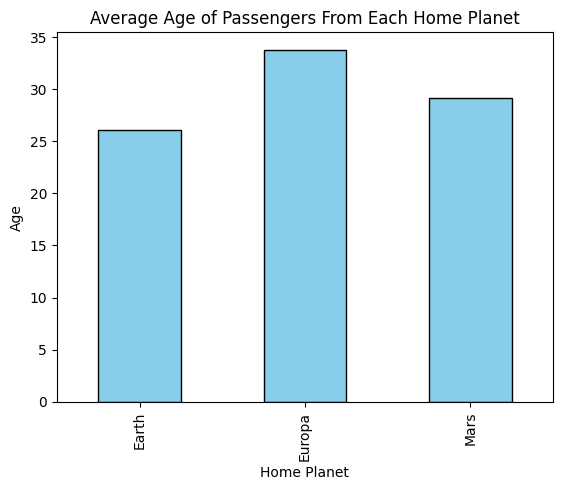

In [20]:
df.groupby('HomePlanet')['Age'].mean().plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Average Age of Passengers From Each Home Planet')
plt.ylabel('Age')
plt.xlabel('Home Planet')
plt.show()

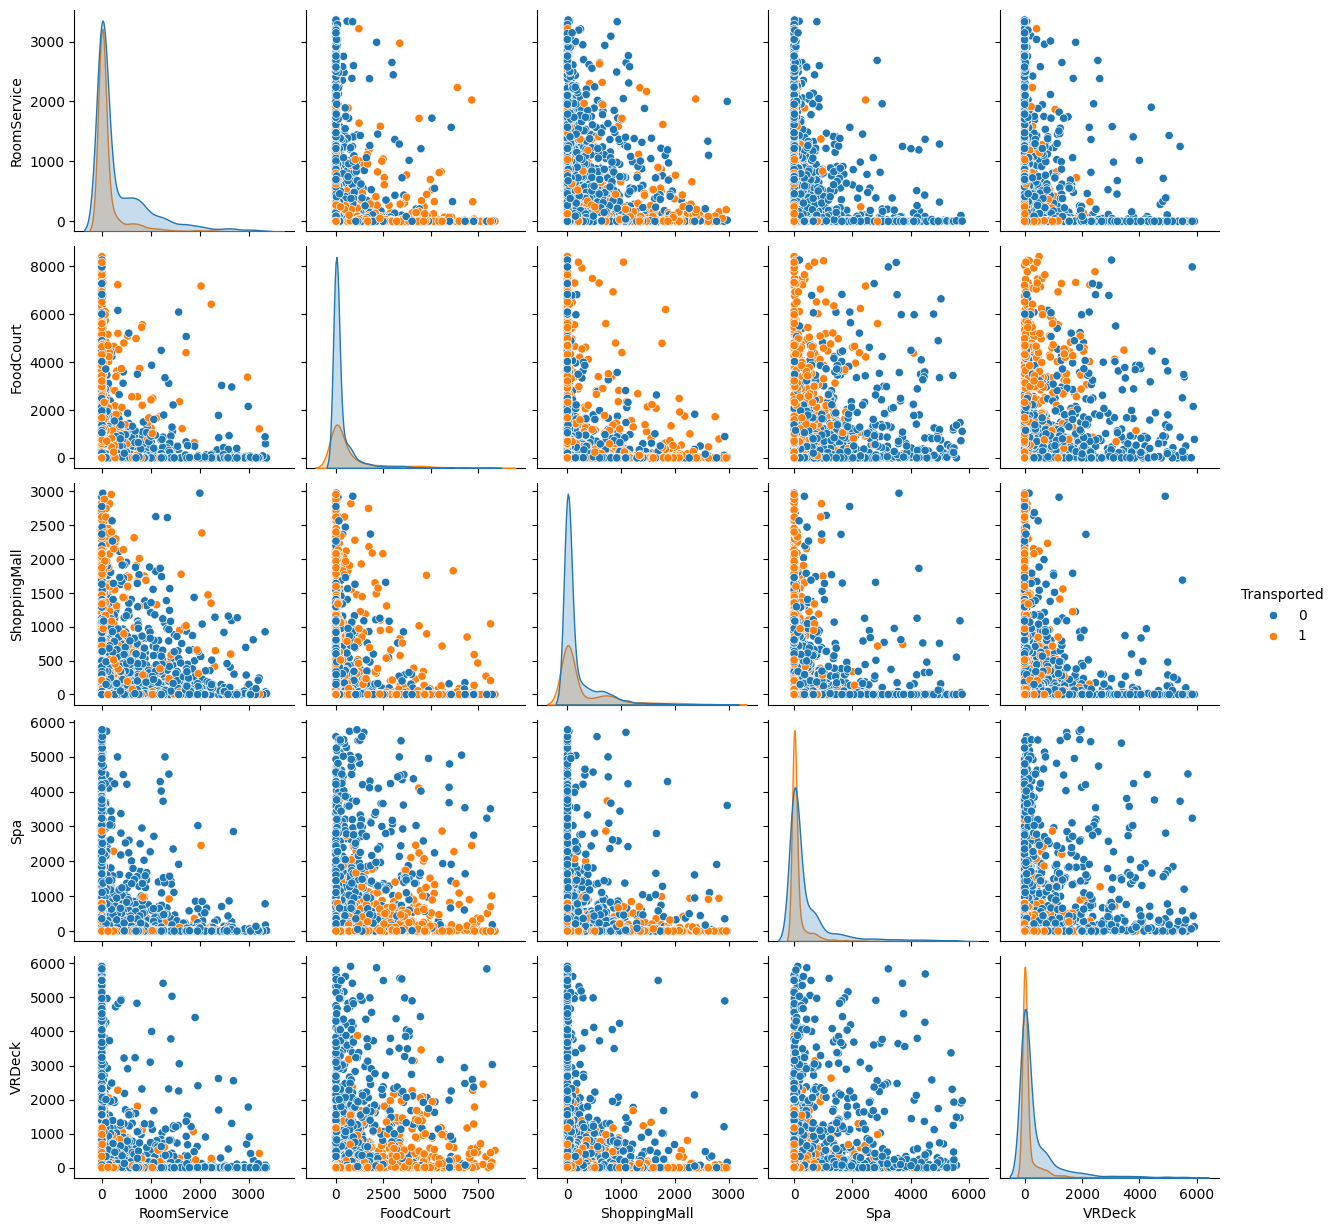

In [21]:
sns.pairplot(df[df['CryoSleep'] == False],
             vars=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
            hue='Transported')
plt.show()

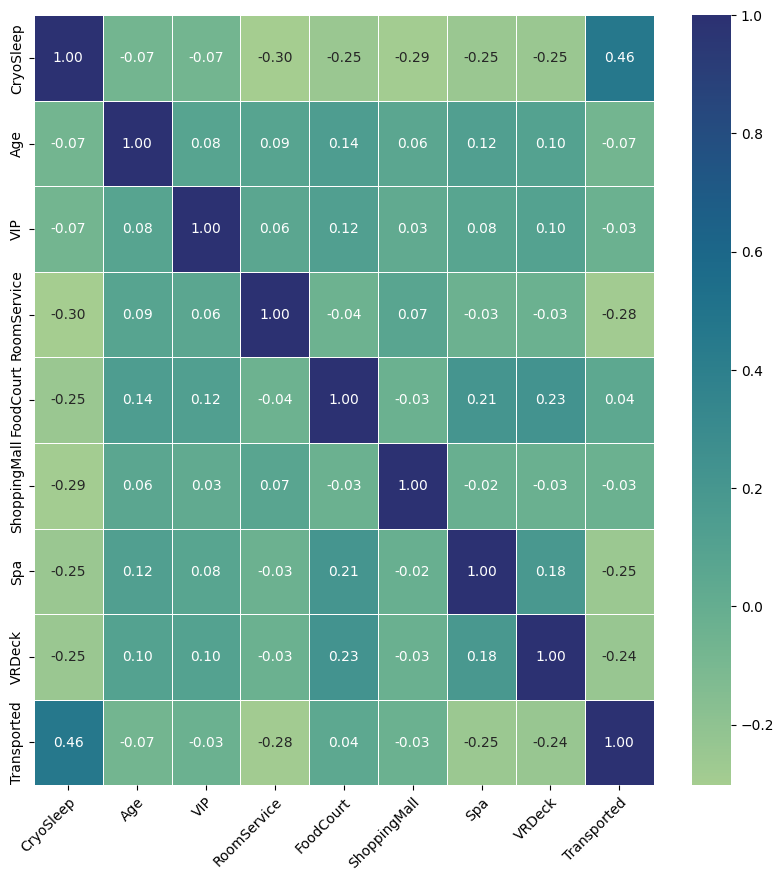

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='crest', annot_kws={"fontsize": 10}, fmt='.2f', linewidths=0.5, cbar=True)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.show()

## Train Model (No Feature Engineering)

I used a simple Logistic Regression model with L2 Regularization to prevent overfitting.

A standard scaler is used to scale all of the train data. The target variable (Transported) remains untouched.

In [23]:
X = df.select_dtypes(include=['number'])
X = X.drop(columns=['Transported'])

y = df['Transported']

In [24]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
X = pd.DataFrame(scaled_features, columns=X.columns)

### Utility Functions

I created three utility functions to simplify training and testing simple Logistic Regression models.

In [25]:
def train_logistic_regression_model(X_train, y_train):
    model = LogisticRegression(penalty='l2')
    model.fit(X_train, y_train)
    return model

In [26]:
def test_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_pred_probability = model.predict_proba(x_test)[:, 1]  # Probability of class 1


    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    print(f"MSE: {mse}")

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy: >.6}")

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)
    print(f"F1 Score: {f1: >.6}")
    

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=[8,3])
    plt.subplot(1, 2, 1)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='crest', cbar=False, linewidths=1,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])

    plt.title('Confusion Matrix')


    # Calculate AUC
    auc = roc_auc_score(y_test, y_pred_probability)
    print(f"AUC: {auc: >.6}")


    # Plot the ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probability)

    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [27]:
def perform_cross_validation(model, folds=5):
    cv_scores = cross_val_score(model, X, y, cv=folds)  # k-fold cross-validation
    print("Cross-validation scores:", cv_scores)
    print("Best result:", max(cv_scores))

### Train and Test Model 1

Here are the model's results for one random validation set:

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

MSE: 0.23762981062919974
Accuracy: 0.76237
F1 Score: 0.763238
AUC: 0.825221


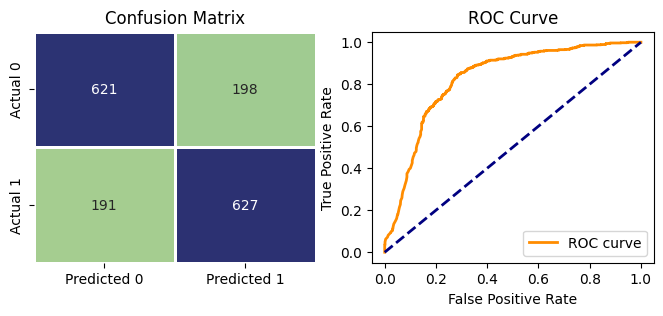

In [29]:
model_1 = train_logistic_regression_model(X_train, y_train)
test_model(model_1, X_test, y_test)

Now let's perform Cross-validation:

In [30]:
perform_cross_validation(model_1)

Cross-validation scores: [0.76298106 0.76114844 0.77017115 0.77139364 0.77933985]
Best result: 0.7793398533007335


## Feature Engineering

In [31]:
df.head(1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0


The Total amount of money spent by each person is easily calculated:

In [32]:
df['TotalSpent'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']

We can use the `PassengerId` and `Cabin` features to extract new features.



`PassengerId` - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group.

In [33]:
passenger_data = df['PassengerId'].str.split('_')

df['PassengerGroup'] = passenger_data.str[0].astype(int)

`Cabin` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

In [34]:
cabin_data = df['Cabin'].str.split('/')

df['CabinDeck'] = cabin_data.str[0]
df['CabinNum'] = cabin_data.str[1].astype(int)
df['CabinSide'] = cabin_data.str[2]

### Feature Encoding

For the `CabinDeck` and `CabinSide` features we can use Label encoding.

In [35]:
label_encoder = LabelEncoder()
df['CabinDeckEncoded'] = label_encoder.fit_transform(df['CabinDeck'])
df['CabinSideEncoded'] = label_encoder.fit_transform(df['CabinSide'])

The `HomePlanet` and `Destination` features must be encoded as one-hot vectors (a total of 6 new features are created).

In [36]:
one_hot_home_planet = pd.get_dummies(df['HomePlanet'], prefix='HomePlanet', dtype=int)
one_hot_destination = pd.get_dummies(df['Destination'], prefix='Destination', dtype=int)

# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, one_hot_home_planet, one_hot_destination], axis=1)

In [37]:
df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpent,PassengerGroup,CabinDeck,CabinNum,CabinSide,CabinDeckEncoded,CabinSideEncoded,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0.0,1,B,0,P,1,0,0,1,0,0,0,1
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,736.0,2,F,0,S,5,1,1,0,0,0,0,1
2,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,5176.0,3,A,0,S,0,1,0,1,0,0,0,1


In [38]:
df.describe(include=['object'])

,PassengerId,HomePlanet,Cabin,Destination,Name,CabinDeck,CabinSide
count,8182,8182,8182,8182,8182,8182,8182
unique,8182,3,6407,3,7975,8,2
top,0001_01,Earth,G/734/S,TRAPPIST-1e,Alraium Disivering,F,S
freq,1,4685,8,5782,191,2767,4131


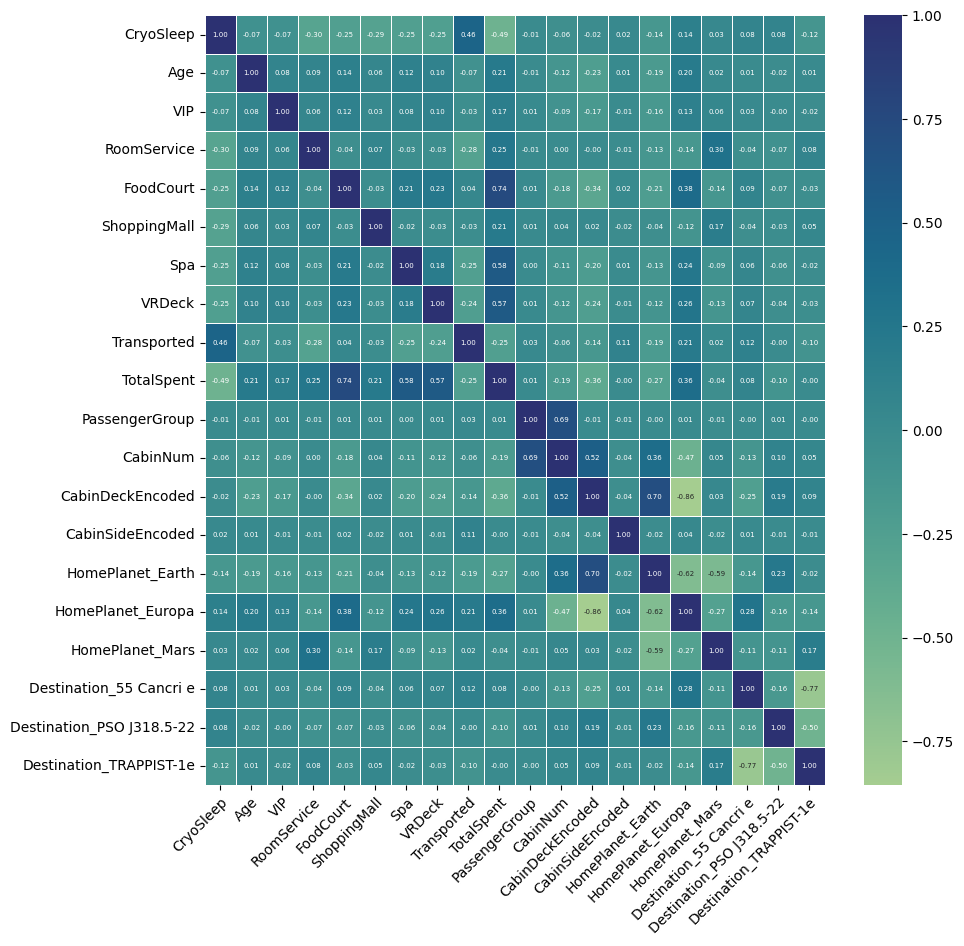

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='crest', annot_kws={"fontsize": 5}, fmt='.2f', linewidths=0.5, cbar=True)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.show()

## Train Model (With Feature Engineering)

I used a simple Logistic Regression model with L2 Regularization to prevent overfitting.

A standard scaler is used to scale all of the train data. The target variable (Transported) remains untouched.

In [40]:
X = df.select_dtypes(include=['number'])
X = X.drop(columns=['Transported'])
X.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'TotalSpent', 'PassengerGroup', 'CabinNum',
       'CabinDeckEncoded', 'CabinSideEncoded', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e'],
      dtype='object')

In [41]:
y = df['Transported']

In [42]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
X = pd.DataFrame(scaled_features, columns=X.columns)

### Train and Test Model 2
Here are the model's results for one random validation set:

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

MSE: 0.23029932803909592
Accuracy: 0.769701
F1 Score: 0.773028
AUC: 0.855661


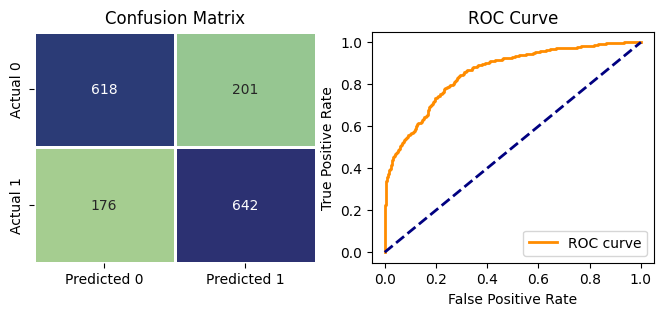

In [44]:
model_2 = train_logistic_regression_model(X_train, y_train)
test_model(model_2, X_test, y_test)

Now let's perform Cross-validation:

In [45]:
perform_cross_validation(model_2)

Cross-validation scores: [0.76237019 0.77947465 0.79156479 0.78545232 0.77567237]
Best result: 0.7915647921760391


### Try different models (Support Vector Classifier and KNN Classifier)

In [46]:
def train_support_vector_classifier(x_train, y_train):
    model = SVC(kernel='rbf', C=1.0, probability=True)
    model.fit(x_train, y_train)
    
    return model

MSE: 0.2217470983506414
Accuracy: 0.778253
F1 Score: 0.778253
AUC: 0.860063


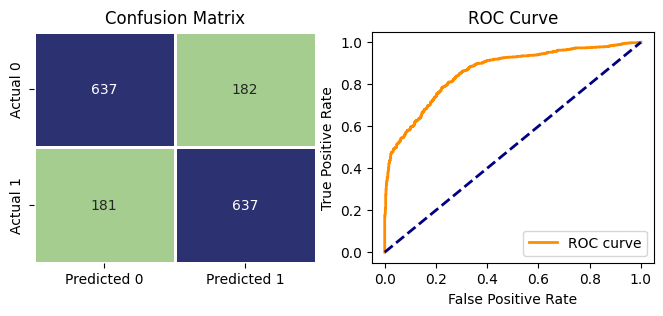

In [47]:
model_3 = train_support_vector_classifier(X_train, y_train)
test_model(model_3, X_test, y_test)

In [48]:
perform_cross_validation(model_3)

Cross-validation scores: [0.75015272 0.78863775 0.79462103 0.81112469 0.79400978]
Best result: 0.8111246943765281


In [49]:
def train_knn_classifier(x_train, y_train):
    model = KNeighborsClassifier(n_neighbors=10)
    model.fit(x_train, y_train)
    
    return model

MSE: 0.24068417837507636
Accuracy: 0.759316
F1 Score: 0.74147
AUC: 0.85616


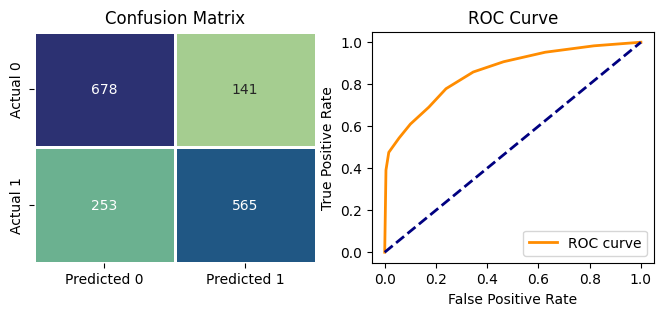

In [50]:
model_4 = train_knn_classifier(X_train, y_train)
test_model(model_4, X_test, y_test)

In [51]:
perform_cross_validation(model_4)

Cross-validation scores: [0.72877214 0.75381796 0.79156479 0.80684597 0.77872861]
Best result: 0.8068459657701712


## Final Results


* Model_1 : Logisitic Regression without feature engineering
<br>Best CV score: **0.77**

* Model_2 : Logisitic Regression with feature engineering
<br>Best CV score: **0.79**

* Model_3 : Support Vector Classifier with feature engineering
<br>Best CV score: **0.81**

* Model_4 : KNN Classifier with feature engineering
<br>Best CV score: **0.80**